# Classification Analysis

In [2]:
# Libraries for working with and plotting data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
# Importing own classes and functions
from logisticReg import SoftmaxReg 
from gdOptimizers import GDOptimizers
from FFNN import FFNN
from gridTest import gridTest, gridCV

## Setup of data

In [3]:
digits = load_digits()
targets = np.zeros((len(digits.target), 10))
for i in range(len(digits.target)):
    targets[i, digits.target[i]] = 1
    
x_train, x_test, y_train, y_test = train_test_split(digits.data, targets, test_size=0.2, random_state=0)

Label: 0


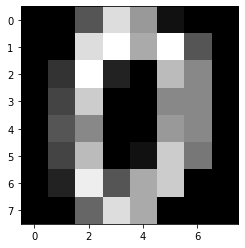

In [4]:
image, label = digits.data[0], digits.target[0]
image = image.reshape((8,8))
plt.imshow(image, cmap='gray')
print('Label:', label)

In [5]:
print(len(targets[:,0]))

1797


## Classification with Logistic regression using SGD

### Example model

In [6]:
sgd = GDOptimizers(learning_rate = 0.01, epochs = 100, batch_size = 10, optimizer = "SGD")
model = SoftmaxReg(64, 10, lmda = 0.01, sgd = sgd)

model.fit(x_train, y_train)
y_train_mdl = model.predict(x_train)
y_train_mdl = (y_train_mdl > 0.5).astype(int)
y_test_mdl = model.predict(x_test)
y_test_mdl = (y_test_mdl > 0.5).astype(int)

print(accuracy_score(y_train_mdl, y_train))
print(accuracy_score(y_test_mdl, y_test))

0.9895615866388309
0.9611111111111111


### Grid search for best performing parameters

In [7]:
def createLR(eta, lmda, params):
    sgd = GDOptimizers(learning_rate = eta, epochs = 100, batch_size = 10, optimizer = "SGD")
    model = SoftmaxReg(params["n_in"], params["n_out"], lmda, sgd)
    return model

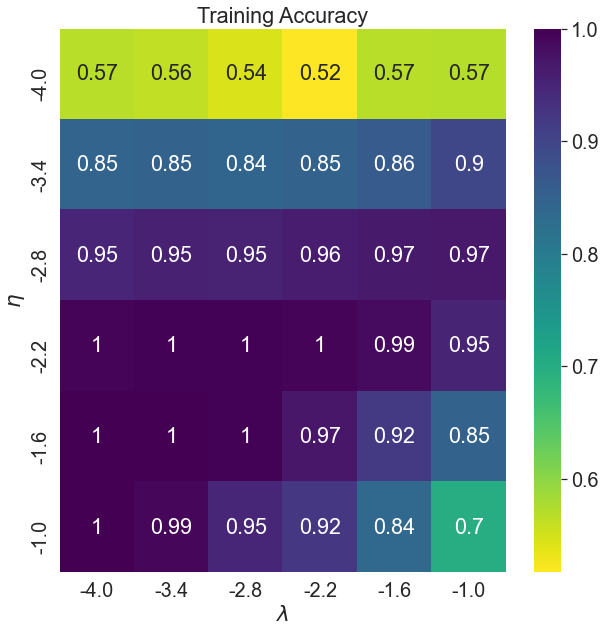

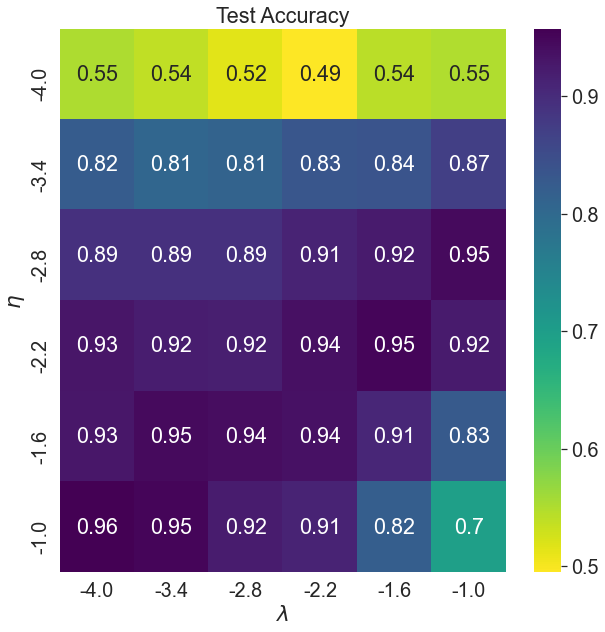

In [8]:
etas = np.logspace(-4, -1, 6)
lmdas = np.logspace(-4, -1, 6)

params = {"n_in": 64, "n_out":10}
#gridTest(etas, lmdas, createLR, params, 'accuracy', x_train, x_test, y_train, y_test)
gridCV(etas, lmdas, createLR, params, 'accuracy', x_train, y_train)

## Classification with our Neural Network

### Example model

In [9]:
nn = FFNN(inputs = 64)
nn.addLayer(neurons = 10, activation = "softmax")
sgd = GDOptimizers(learning_rate = 0.01, epochs = 100, batch_size = 10, optimizer = "SGD")
nn.compile(loss = "cross", optimizer=sgd, lmda = 0.01)

nn.fit(x_train, y_train)
y_train_mdl = nn.predict(x_train)
y_train_mdl = (y_train_mdl > 0.5).astype(int)
y_test_mdl = nn.predict(x_test)
y_test_mdl = (y_test_mdl > 0.5).astype(int)

print(accuracy_score(y_train_mdl, y_train))
print(accuracy_score(y_test_mdl, y_test))

0.988865692414753
0.9472222222222222


### Grid search for best performing parameters

In [10]:
def createNN(eta, lmda, params):
    nn = FFNN(inputs = params["inputs"])
    for nrons, activation in zip(params["neurons"], params["activations"]):
        nn.addLayer(neurons = nrons, activation = activation)

    sgd = GDOptimizers(learning_rate = eta, epochs = 100, batch_size = 10, optimizer = "SGD")
    nn.compile(loss = params["loss"], optimizer=sgd, lmda = lmda)
    return nn

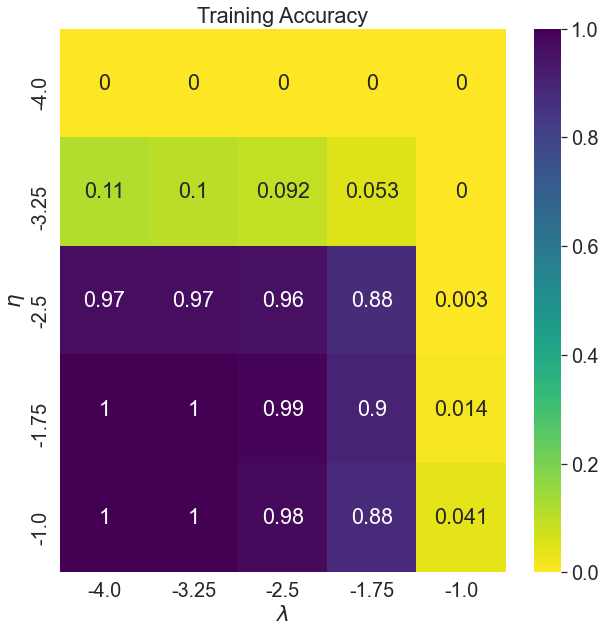

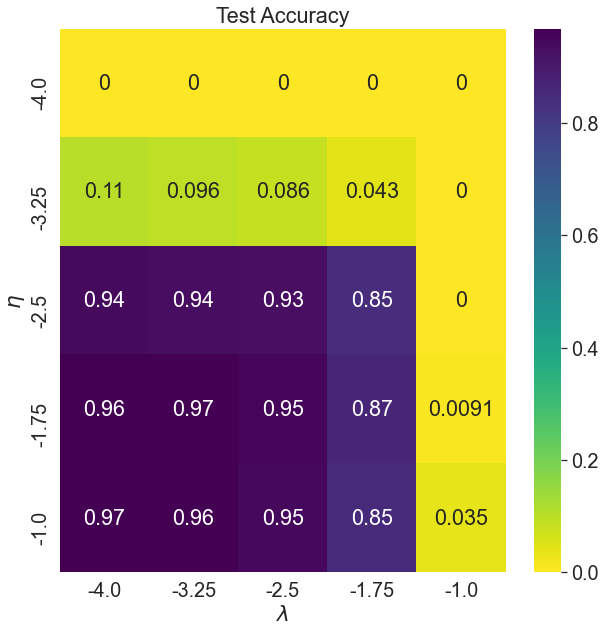

In [11]:
etas = np.logspace(-4, -1, 5)
lmdas = np.logspace(-4, -1, 5)

params = {"inputs": 64, "neurons": [40,10], "activations":["sigmoid","softmax"], "loss":"cross"}
#gridTest(etas, lmdas, createNN, params, 'accuracy', x_train, x_test, y_train, y_test)
gridCV(etas, lmdas, createNN, params, 'accuracy', x_train, y_train)

## Classification with Sklearn

### Changing format of data

In [12]:
# y_data has to be label, not onehot vector for Sklearn
y_train_sk = np.argmax(y_train, axis=1)
y_test_sk = np.argmax(y_test, axis=1)

### Example model

In [13]:
model = LogisticRegression(penalty = 'l2', solver='saga', multi_class='multinomial', max_iter=100)
model.fit(x_train, y_train_sk)

y_mdl = model.predict(x_test)
print(accuracy_score(y_mdl, y_test_sk))

0.9638888888888889


C:\Users\KarlH\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [14]:
model = SGDClassifier(penalty='l2', loss='log', alpha = 0.01, learning_rate = 'constant', eta0 = 0.001)
model.fit(x_train, y_train_sk)

y_mdl = model.predict(x_test)
print(accuracy_score(y_mdl, y_test_sk))

0.9694444444444444


### Grid search for best performing parameters

In [15]:
def createLRsklearn(eta, lmda, params):
    model = SGDClassifier(penalty= params["penalty"], loss=params["loss"], alpha = lmda, learning_rate = 'constant', eta0 = eta)
    return model

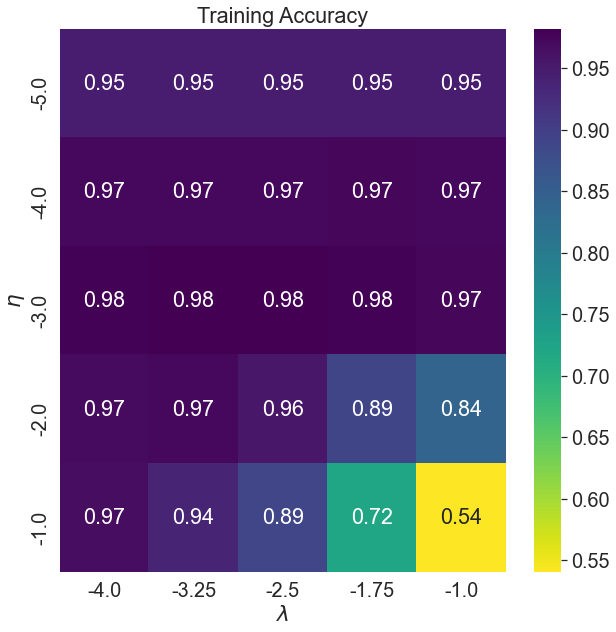

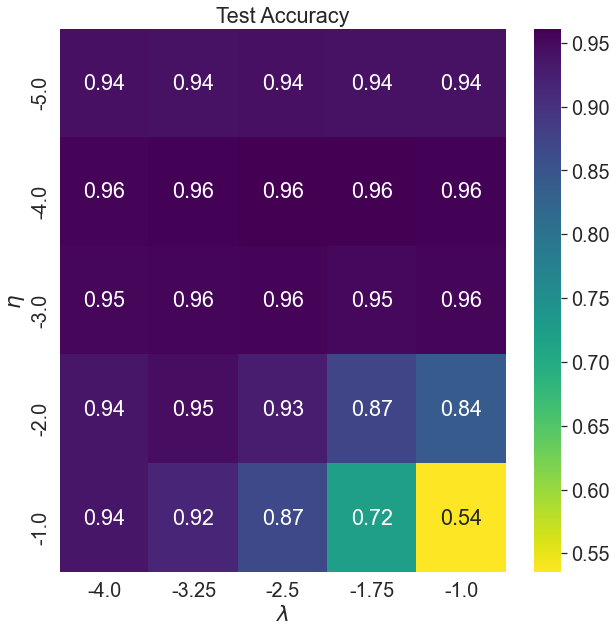

In [16]:
etas = np.logspace(-5, -1, 5)
lmdas = np.logspace(-4, -1, 5)

params = {"penalty": 'l2', "loss": 'log'}
#gridTest(etas, lmdas, createLRsklearn, params, 'accuracy_skl', x_train, x_test, y_train_sk, y_test_sk)
gridCV(etas, lmdas, createLRsklearn, params, 'accuracy_skl', x_train, y_train_sk)